In [1]:
import numpy as np
import random
import copy
import h5py
from scipy.stats import sem
Polynomial = np.polynomial.Polynomial
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

from scipy.interpolate import interp1d
import pickle
import sympy
from sympy import init_printing
init_printing(use_latex=True)
from scipy.integrate import odeint

In [2]:
n = 100
l = 3*n
t =200
A = 0.1
samples =1000000
freq = 2*np.pi*np.fft.fftfreq(l)

In [3]:
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k48.pickle', 'rb') as data:
	temp=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_k40.pickle', 'rb') as data:
	temp1=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k34.pickle', 'rb') as data:
	temp2=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur.pickle', 'rb') as data:
	temp3=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k28.pickle', 'rb') as data:
	temp4=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k24.pickle', 'rb') as data:
	temp5=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k22.pickle', 'rb') as data:
	temp6=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k20.pickle', 'rb') as data:
	temp7=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k18.pickle', 'rb') as data:
	temp8=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t50_k17.pickle', 'rb') as data:
	temp9=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t100_k16.pickle', 'rb') as data:
	temp10=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t100_k12.pickle', 'rb') as data:
	temp11=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t200_k10.pickle', 'rb') as data:
	temp12=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t250_k8.pickle', 'rb') as data:
	temp13=pickle.load(data)

'''f = h5py.File("/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_0.5_A.1_t100_kpi_L300_rho_curr.hdf5", "r")
dset = f['init']
rho , curr = zip (* dset )
rh = np.asarray(rho)
del rho
del curr
rh = np.mean(rh,axis=0)'''
'''
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k3_L99.pickle', 'rb') as data:
	temp14=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k4_L99.pickle', 'rb') as data:
	temp15=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k6_L99.pickle', 'rb') as data:
	temp16=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k8_L99.pickle', 'rb') as data:
	temp17=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k10_L99.pickle', 'rb') as data:
	temp18=pickle.load(data)
    
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k12_L99.pickle', 'rb') as data:
	temp19=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k14_L99.pickle', 'rb') as data:
	temp20=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k16_L99.pickle', 'rb') as data:
	temp21=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k18_L99.pickle', 'rb') as data:
	temp22=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k20_L99.pickle', 'rb') as data:
	temp23=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t250_k2_L99.pickle', 'rb') as data:
	temp24=pickle.load(data)
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t1000_k1_L99.pickle', 'rb') as data:
	temp25=pickle.load(data)

'''

"\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k3_L99.pickle', 'rb') as data:\n\ttemp14=pickle.load(data)\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k4_L99.pickle', 'rb') as data:\n\ttemp15=pickle.load(data)\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k6_L99.pickle', 'rb') as data:\n\ttemp16=pickle.load(data)\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k8_L99.pickle', 'rb') as data:\n\ttemp17=pickle.load(data)\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t100_k10_L99.pickle', 'rb') as data:\n\ttemp18=pickle.load(data)\n    \nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k12_L99.pickle', 'rb') as data:\n\ttemp19=pickle.load(data)\nwith open('/Users/abhishekraj/Documents/Non_linear_Diff/data/hts_w_cur_0.5_A.1_t200_k14_L99.pickle', 'rb') as data:\n\ttemp20

In [4]:
m_rho_ft = temp[1]
m_rho_ft1 = temp1[1]
m_rho_ft2 = temp2[1]
m_rho_ft3 = temp3[1]
m_rho_ft4 = temp4[1]
m_rho_ft5 = temp5[1]
m_rho_ft6 = temp6[1]
m_rho_ft7 = temp7[1]
m_rho_ft8 = temp8[1]
m_rho_ft9 = temp9[1]
m_rho_ft10 = temp10[1]
m_rho_ft11 = temp11[1]
m_rho_ft12 = temp12[1]
m_rho_ft13 = temp13[1]
#rh_ft = np.fft.ifft(rh,axis=0)
'''
m_rho_ft14 = temp14[1]
m_rho_ft15 = temp15[1]
m_rho_ft16 = temp16[1]
m_rho_ft17 = temp17[1]
m_rho_ft18 = temp18[1]

m_rho_ft19 = temp19[1]
m_rho_ft20 = temp20[1]
m_rho_ft21 = temp21[1]
m_rho_ft22 = temp22[1]
m_rho_ft23 = temp23[1]
m_rho_ft24 = temp24[1]
m_rho_ft25 = temp25[1]
'''

'\nm_rho_ft14 = temp14[1]\nm_rho_ft15 = temp15[1]\nm_rho_ft16 = temp16[1]\nm_rho_ft17 = temp17[1]\nm_rho_ft18 = temp18[1]\n\nm_rho_ft19 = temp19[1]\nm_rho_ft20 = temp20[1]\nm_rho_ft21 = temp21[1]\nm_rho_ft22 = temp22[1]\nm_rho_ft23 = temp23[1]\nm_rho_ft24 = temp24[1]\nm_rho_ft25 = temp25[1]\n'

In [99]:
#x = m_rho_ft13.real[8,:]/m_rho_ft13.real[8,0]

In [100]:
#np.savetxt("./rho_data/K8.txt", x)

In [61]:
'''plt.plot((freq[40]**2)*np.arange(51)[4:20], (np.sqrt(l)*m_rho_ft1.real[40,4:20])/samples)
plt.plot((freq[34]**2)*np.arange(51)[5:30], (np.sqrt(l)*m_rho_ft2.real[34,5:30])/samples)
plt.plot((freq[30]**2)*np.arange(51)[7:40], (np.sqrt(l)*m_rho_ft3.real[30,7:40])/samples)
plt.plot((freq[28]**2)*np.arange(51)[10:50], (np.sqrt(l)*m_rho_ft4.real[28,10:50])/samples)
plt.plot((freq[24]**2)*np.arange(51)[12:80], (np.sqrt(l)*m_rho_ft5.real[24,12:80])/samples)
plt.plot((freq[22]**2)*np.arange(51)[7:40], (np.sqrt(l)*m_rho_ft6.real[22,7:40])/samples)
plt.plot((freq[20]**2)*np.arange(51)[10:50], (np.sqrt(l)*m_rho_ft7.real[20,10:50])/samples)
plt.plot((freq[18]**2)*np.arange(51)[12:80], (np.sqrt(l)*m_rho_ft8.real[18,12:80])/samples)'''

'plt.plot((freq[40]**2)*np.arange(51)[4:20], (np.sqrt(l)*m_rho_ft1.real[40,4:20])/samples)\nplt.plot((freq[34]**2)*np.arange(51)[5:30], (np.sqrt(l)*m_rho_ft2.real[34,5:30])/samples)\nplt.plot((freq[30]**2)*np.arange(51)[7:40], (np.sqrt(l)*m_rho_ft3.real[30,7:40])/samples)\nplt.plot((freq[28]**2)*np.arange(51)[10:50], (np.sqrt(l)*m_rho_ft4.real[28,10:50])/samples)\nplt.plot((freq[24]**2)*np.arange(51)[12:80], (np.sqrt(l)*m_rho_ft5.real[24,12:80])/samples)\nplt.plot((freq[22]**2)*np.arange(51)[7:40], (np.sqrt(l)*m_rho_ft6.real[22,7:40])/samples)\nplt.plot((freq[20]**2)*np.arange(51)[10:50], (np.sqrt(l)*m_rho_ft7.real[20,10:50])/samples)\nplt.plot((freq[18]**2)*np.arange(51)[12:80], (np.sqrt(l)*m_rho_ft8.real[18,12:80])/samples)'

In [ ]:
rh_ft.shape

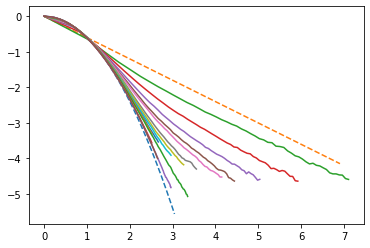

In [119]:
plt.plot((np.sqrt((freq[8]**2)*np.arange(331))),(-0.6*(freq[8]**2)*np.arange(331)),'--')
plt.plot((np.sqrt((freq[8]**2)*np.arange(1701))),-(0.6*np.sqrt((freq[8]**2)*np.arange(1701))),'--')


plt.plot(np.sqrt((freq[48]**2)*np.arange(51)), np.log(m_rho_ft.real[48,:]/m_rho_ft.real[48,0]))

plt.plot(np.sqrt((freq[40]**2)*np.arange(51)), np.log(m_rho_ft1.real[40,:]/m_rho_ft1.real[40,0]))

plt.plot(np.sqrt((freq[34]**2)*np.arange(51)), np.log(m_rho_ft2.real[34,:]/m_rho_ft2.real[34,0]))


plt.plot((np.sqrt((freq[30]**2)*np.arange(51))), np.log(m_rho_ft3.real[30,:]/m_rho_ft3.real[30,0]))

plt.plot((np.sqrt((freq[28]**2)*np.arange(51))), np.log(m_rho_ft4.real[28,:]/m_rho_ft4.real[28,0]))
plt.plot((np.sqrt((freq[24]**2)*np.arange(51))), np.log(m_rho_ft5.real[24,:]/m_rho_ft5.real[24,0]))
plt.plot((np.sqrt((freq[22]**2)*np.arange(51))), np.log(m_rho_ft6.real[22,:]/m_rho_ft6.real[22,0]))

plt.plot((np.sqrt((freq[20]**2)*np.arange(51))), np.log(m_rho_ft7.real[20,:]/m_rho_ft7.real[20,0]))
plt.plot((np.sqrt((freq[18]**2)*np.arange(51))), np.log(m_rho_ft8.real[18,:]/m_rho_ft8.real[18,0]))
plt.plot((np.sqrt((freq[17]**2)*np.arange(51))), np.log(m_rho_ft9.real[17,:]/m_rho_ft9.real[17,0]))
plt.plot((np.sqrt((freq[16]**2)*np.arange(101))), np.log(m_rho_ft10.real[16,:]/m_rho_ft10.real[16,0]))
plt.plot((np.sqrt((freq[12]**2)*np.arange(101))), np.log(m_rho_ft11.real[12,:]/m_rho_ft11.real[12,0]))

plt.plot((np.sqrt((freq[10]**2)*np.arange(201))), np.log(m_rho_ft12.real[10,:]/m_rho_ft12.real[10,0]))
plt.plot((np.sqrt((freq[8]**2)*np.arange(251))), np.log(m_rho_ft13.real[8,:]/m_rho_ft13.real[8,0]))


<ipython-input-112-000a00573de7>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sqrt((freq[8]**2)*np.arange(331))),np.log(0.6*(freq[8]**2)*np.arange(331)),'--')
<ipython-input-112-000a00573de7>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sqrt((freq[8]**2)*np.arange(1701))),np.log(np.sqrt(0.6*(freq[8]**2)*np.arange(1701))),'--')
<ipython-input-112-000a00573de7>:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sqrt((freq[30]**2)*np.arange(51))), np.log(-np.log(m_rho_ft3.real[30,:]/m_rho_ft3.real[30,0])))
<ipython-input-112-000a00573de7>:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sqrt((freq[28]**2)*np.arange(51))), np.log(-np.log(m_rho_ft4.real[28,:]/m_rho_ft4.real[28,0])))
<ipython-input-112-000a00573de7>:15: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.sqrt((freq[24]**2)*np.arange(51))), np.log(-np.log(m_rho_ft5.real[24,:]/m_rho_ft5.real[24,0])))
<

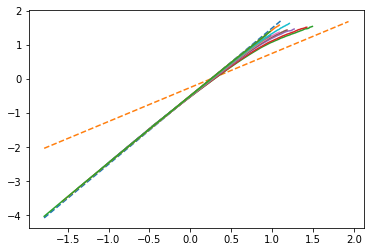

In [112]:
#plt.plot(np.sqrt((freq[150]**2)*np.arange(21)), np.log(rh_ft.real[150,0:21]/rh_ft.real[150,0]))
plt.plot(np.log(np.sqrt((freq[8]**2)*np.arange(331))),np.log(0.6*(freq[8]**2)*np.arange(331)),'--')
plt.plot(np.log(np.sqrt((freq[8]**2)*np.arange(1701))),np.log(np.sqrt(0.6*(freq[8]**2)*np.arange(1701))),'--')

'''
plt.plot(np.sqrt((freq[48]**2)*np.arange(51)), np.log(m_rho_ft.real[48,:]/m_rho_ft.real[48,0]))

plt.plot(np.sqrt((freq[40]**2)*np.arange(51)), np.log(m_rho_ft1.real[40,:]/m_rho_ft1.real[40,0]))
plt.plot(np.sqrt((freq[34]**2)*np.arange(51)), np.log(m_rho_ft2.real[34,:]/m_rho_ft2.real[34,0]))
'''

plt.plot(np.log(np.sqrt((freq[30]**2)*np.arange(51))), np.log(-np.log(m_rho_ft3.real[30,:]/m_rho_ft3.real[30,0])))

plt.plot(np.log(np.sqrt((freq[28]**2)*np.arange(51))), np.log(-np.log(m_rho_ft4.real[28,:]/m_rho_ft4.real[28,0])))
plt.plot(np.log(np.sqrt((freq[24]**2)*np.arange(51))), np.log(-np.log(m_rho_ft5.real[24,:]/m_rho_ft5.real[24,0])))
plt.plot(np.log(np.sqrt((freq[22]**2)*np.arange(51))), np.log(-np.log(m_rho_ft6.real[22,:]/m_rho_ft6.real[22,0])))

plt.plot(np.log(np.sqrt((freq[20]**2)*np.arange(51))), np.log(-np.log(m_rho_ft7.real[20,:]/m_rho_ft7.real[20,0])))
plt.plot(np.log(np.sqrt((freq[18]**2)*np.arange(51))), np.log(-np.log(m_rho_ft8.real[18,:]/m_rho_ft8.real[18,0])))
plt.plot(np.log(np.sqrt((freq[17]**2)*np.arange(51))), np.log(-np.log(m_rho_ft9.real[17,:]/m_rho_ft9.real[17,0])))
plt.plot(np.log(np.sqrt((freq[16]**2)*np.arange(101))), np.log(-np.log(m_rho_ft10.real[16,:]/m_rho_ft10.real[16,0])))
plt.plot(np.log(np.sqrt((freq[12]**2)*np.arange(101))), np.log(-np.log(m_rho_ft11.real[12,:]/m_rho_ft11.real[12,0])))

plt.plot(np.log(np.sqrt((freq[10]**2)*np.arange(201))), np.log(-np.log(m_rho_ft12.real[10,:]/m_rho_ft12.real[10,0])))
plt.plot(np.log(np.sqrt((freq[8]**2)*np.arange(251))), np.log(-np.log(m_rho_ft13.real[8,:]/m_rho_ft13.real[8,0])))

#plt.vlines(x = 0.2554, ymin = -4, ymax = 2)

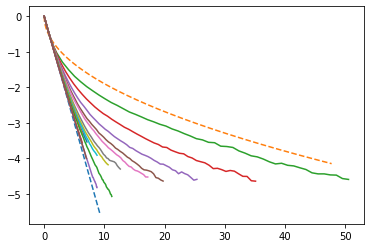

In [121]:
#plt.plot(((freq[150]**2)*np.arange(11)), np.log(rh_ft.real[150,0:11]/rh_ft.real[150,0]))

plt.plot((freq[8]**2)*np.arange(331),-0.6*(freq[8]**2)*np.arange(331),'--')
plt.plot((freq[8]**2)*np.arange(1701),-0.6*np.sqrt((freq[8]**2)*np.arange(1701)),'--')

plt.plot(((freq[48]**2)*np.arange(51)), np.log(m_rho_ft.real[48,:]/m_rho_ft.real[48,0]))
plt.plot(((freq[40]**2)*np.arange(51)), np.log(m_rho_ft1.real[40,:]/m_rho_ft1.real[40,0]))
plt.plot(((freq[34]**2)*np.arange(51)), np.log(m_rho_ft2.real[34,:]/m_rho_ft2.real[34,0]))
plt.plot(((freq[30]**2)*np.arange(51)), np.log(m_rho_ft3.real[30,:]/m_rho_ft3.real[30,0]))




plt.plot(((freq[28]**2)*np.arange(51)), np.log(m_rho_ft4.real[28,:]/m_rho_ft4.real[28,0]))
plt.plot(((freq[24]**2)*np.arange(51)), np.log(m_rho_ft5.real[24,:]/m_rho_ft5.real[24,0]))
plt.plot(((freq[22]**2)*np.arange(51)), np.log(m_rho_ft6.real[22,:]/m_rho_ft6.real[22,0]))

plt.plot(((freq[20]**2)*np.arange(51)), np.log(m_rho_ft7.real[20,:]/m_rho_ft7.real[20,0]))
plt.plot(((freq[18]**2)*np.arange(51)), np.log(m_rho_ft8.real[18,:]/m_rho_ft8.real[18,0]))

plt.plot(((freq[17]**2)*np.arange(51)), np.log(m_rho_ft9.real[17,:]/m_rho_ft9.real[17,0]))

plt.plot(((freq[16]**2)*np.arange(101)), np.log(m_rho_ft10.real[16,:]/m_rho_ft10.real[16,0]))
plt.plot(((freq[12]**2)*np.arange(101)), np.log(m_rho_ft11.real[12,:]/m_rho_ft11.real[12,0]))

plt.plot(((freq[10]**2)*np.arange(201)), np.log(m_rho_ft12.real[10,:]/m_rho_ft12.real[10,0]))
plt.plot(((freq[8]**2)*np.arange(251)), np.log(m_rho_ft13.real[8,:]/m_rho_ft13.real[8,0]))

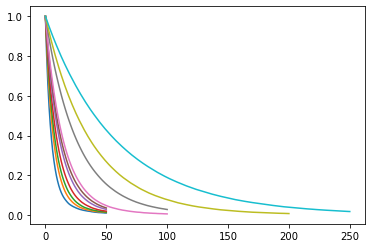

In [122]:
plt.plot((np.arange(51)), (m_rho_ft4.real[28,:]/m_rho_ft4.real[28,0]))
plt.plot((np.arange(51)), (m_rho_ft5.real[24,:]/m_rho_ft5.real[24,0]))
plt.plot((np.arange(51)), (m_rho_ft6.real[22,:]/m_rho_ft6.real[22,0]))
plt.plot((np.arange(51)), (m_rho_ft7.real[20,:]/m_rho_ft7.real[20,0]))
plt.plot((np.arange(51)), (m_rho_ft8.real[18,:]/m_rho_ft8.real[18,0]))
plt.plot((np.arange(51)), (m_rho_ft9.real[17,:]/m_rho_ft9.real[17,0]))
plt.plot((np.arange(101)), (m_rho_ft10.real[16,:]/m_rho_ft10.real[16,0]))
plt.plot((np.arange(101)), (m_rho_ft11.real[12,:]/m_rho_ft11.real[12,0]))

plt.plot((np.arange(201)), (m_rho_ft12.real[10,:]/m_rho_ft12.real[10,0]))
plt.plot((np.arange(251)), (m_rho_ft13.real[8,:]/m_rho_ft13.real[8,0]))

In [ ]:
plt.plot((freq[48]**2)*np.arange(51), (np.sqrt(l)*m_rho_ft.real[48,:])/samples)

In [ ]:
(freq[10]**2)*np.arange(251)[159]

In [ ]:
f = [freq[8],freq[10],freq[12],freq[16],freq[17],freq[18],freq[20],freq[22],freq[24],freq[28],freq[30],freq[34],freq[40],freq[48]]
f1 = [freq[8],freq[10],freq[16],freq[18],freq[20],freq[22],freq[24],freq[28],freq[30],freq[34],freq[40],freq[48]]

In [ ]:
a4 = [(m_rho_ft13.real[8,143]/samples)/(m_rho_ft13.real[8,0]/samples),(m_rho_ft12.real[10,92]/samples)/(m_rho_ft12.real[10,0]/samples),(m_rho_ft11.real[12,64]/samples)/(m_rho_ft11.real[12,0]/samples),(m_rho_ft10.real[16,36]/samples)/(m_rho_ft10.real[16,0]/samples),(m_rho_ft9.real[17,32]/samples)/(m_rho_ft9.real[17,0]/samples),(m_rho_ft8.real[18,28]/samples)/(m_rho_ft8.real[18,0]/samples),(m_rho_ft7.real[20,23]/samples)/(m_rho_ft7.real[20,0]/samples),(m_rho_ft6.real[22,19]/samples)/(m_rho_ft6.real[22,0]/samples),(m_rho_ft5.real[24,16]/samples)/(m_rho_ft5.real[24,0]/samples),(m_rho_ft4.real[28,12]/samples)/(m_rho_ft4.real[28,0]/samples),(m_rho_ft3.real[30,10]/samples)/(m_rho_ft3.real[30,0]/samples),(m_rho_ft2.real[34,8]/samples)/(m_rho_ft2.real[34,0]/samples),(m_rho_ft1.real[40,6]/samples)/(m_rho_ft1.real[40,0]/samples),(m_rho_ft.real[48,4]/samples)/(m_rho_ft.real[48,0]/samples)]

In [ ]:
a5 = [(m_rho_ft13.real[8,178]/samples)/(m_rho_ft13.real[8,0]/samples),(m_rho_ft12.real[10,114]/samples)/(m_rho_ft12.real[10,0]/samples),(m_rho_ft11.real[12,80]/samples)/(m_rho_ft11.real[12,0]/samples),(m_rho_ft10.real[16,45]/samples)/(m_rho_ft10.real[16,0]/samples),(m_rho_ft9.real[17,40]/samples)/(m_rho_ft9.real[17,0]/samples),(m_rho_ft8.real[18,35]/samples)/(m_rho_ft8.real[18,0]/samples),(m_rho_ft7.real[20,29]/samples)/(m_rho_ft7.real[20,0]/samples),(m_rho_ft6.real[22,24]/samples)/(m_rho_ft6.real[22,0]/samples),(m_rho_ft5.real[24,20]/samples)/(m_rho_ft5.real[24,0]/samples),(m_rho_ft4.real[28,15]/samples)/(m_rho_ft4.real[28,0]/samples),(m_rho_ft3.real[30,13]/samples)/(m_rho_ft3.real[30,0]/samples),(m_rho_ft2.real[34,10]/samples)/(m_rho_ft2.real[34,0]/samples),(m_rho_ft1.real[40,7]/samples)/(m_rho_ft1.real[40,0]/samples),(m_rho_ft.real[48,5]/samples)/(m_rho_ft.real[48,0]/samples)]

In [ ]:
a7 = [(m_rho_ft13.real[8,250])/(m_rho_ft13.real[8,0]),(m_rho_ft12.real[10,160])/(m_rho_ft12.real[10,0]),(m_rho_ft10.real[16,63])/(m_rho_ft10.real[16,0]),(m_rho_ft8.real[18,49])/(m_rho_ft8.real[18,0]),(m_rho_ft7.real[20,40])/(m_rho_ft7.real[20,0]),(m_rho_ft6.real[22,33])/(m_rho_ft6.real[22,0]),(m_rho_ft5.real[24,28])/(m_rho_ft5.real[24,0]),(m_rho_ft4.real[28,20])/(m_rho_ft4.real[28,0]),(m_rho_ft3.real[30,18])/(m_rho_ft3.real[30,0]),(m_rho_ft2.real[34,14])/(m_rho_ft2.real[34,0]),(m_rho_ft1.real[40,10])/(m_rho_ft1.real[40,0]),(m_rho_ft.real[48,7])/(m_rho_ft.real[48,0])]

In [ ]:
plt.scatter(f,a4,label=r"$Q^2 t = 4$")
plt.scatter(f,a5,label=r"$Q^2 t = 5$")
#plt.scatter(f1,a7,label=r"$Q^2 t = 7$")
plt.scatter(f99,a4_99,label=r"$Q^2 t = 4$")
plt.scatter(f99_5,a5_99,label=r"$Q^2 t = 5$")
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.yticks([0,np.exp(-0.6*4),np.exp(-0.6*5),np.exp(-0.6*7)],[0,r'$e^{-D4}$',r'$e^{-D5}$',r'$e^{-D7}$'])
plt.xlabel(r"K")
plt.ylabel(r"$\langle \rho \rangle$")
plt.legend()
#plt.savefig('./Figures/q2t1.jpg')

In [ ]:
f_n = [freq[-48],freq[-40],freq[-34],freq[-30],freq[-28],freq[-24],freq[-22],freq[-20],freq[-18],freq[18],freq[20],freq[22],freq[24],freq[28],freq[30],freq[34],freq[40],freq[48]]

In [ ]:
a4_n = [m_rho_ft.real[-48,4]/samples,m_rho_ft1.real[-40,6]/samples,m_rho_ft2.real[-34,8]/samples,m_rho_ft3.real[-30,10]/samples,m_rho_ft4.real[-28,12]/samples,m_rho_ft5.real[-24,16]/samples,m_rho_ft6.real[-22,19]/samples,m_rho_ft7.real[-20,23]/samples,m_rho_ft8.real[-18,28]/samples,m_rho_ft8.real[18,28]/samples,m_rho_ft7.real[20,23]/samples,m_rho_ft6.real[22,19]/samples,m_rho_ft5.real[24,16]/samples,m_rho_ft4.real[28,12]/samples,m_rho_ft3.real[30,10]/samples,m_rho_ft2.real[34,8]/samples,m_rho_ft1.real[40,6]/samples,m_rho_ft.real[48,4]/samples]

In [ ]:
a5_n = [m_rho_ft.real[-48,5]/samples,m_rho_ft1.real[-40,7]/samples,m_rho_ft2.real[-34,10]/samples,m_rho_ft3.real[-30,13]/samples,m_rho_ft4.real[-28,15]/samples,m_rho_ft5.real[-24,20]/samples,m_rho_ft6.real[-22,24]/samples,m_rho_ft7.real[-20,29]/samples,m_rho_ft8.real[-18,35]/samples,m_rho_ft8.real[18,35]/samples,m_rho_ft7.real[20,29]/samples,m_rho_ft6.real[22,24]/samples,m_rho_ft5.real[24,20]/samples,m_rho_ft4.real[28,15]/samples,m_rho_ft3.real[30,13]/samples,m_rho_ft2.real[34,10]/samples,m_rho_ft1.real[40,7]/samples,m_rho_ft.real[48,5]/samples]

In [ ]:
a7_n = [m_rho_ft.real[-48,7]/samples,m_rho_ft1.real[-40,10]/samples,m_rho_ft2.real[-34,14]/samples,m_rho_ft3.real[-30,18]/samples,m_rho_ft4.real[-28,20]/samples,m_rho_ft5.real[-24,28]/samples,m_rho_ft6.real[-22,33]/samples,m_rho_ft7.real[-20,40]/samples,m_rho_ft8.real[-18,49]/samples,m_rho_ft8.real[18,49]/samples,m_rho_ft7.real[20,40]/samples,m_rho_ft6.real[22,33]/samples,m_rho_ft5.real[24,28]/samples,m_rho_ft4.real[28,20]/samples,m_rho_ft3.real[30,18]/samples,m_rho_ft2.real[34,14]/samples,m_rho_ft1.real[40,10]/samples,m_rho_ft.real[48,7]/samples]

In [ ]:
plt.scatter(f_n,a4_n,label=r"$Q^2 t = 4$")
plt.scatter(f_n,a5_n,label=r"$Q^2 t = 5$")
plt.scatter(f_n,a7_n,label=r"$Q^2 t = 7$")
plt.xlabel(r"K")
plt.ylabel(r"$\langle \rho \rangle$")
plt.legend()
#plt.savefig('./Figures/q2t.pdf')

In [ ]:
plt.plot(np.arange(51), (np.sqrt(l)*m_rho_ft.real[48,:])/samples)
plt.plot(np.arange(51), (np.sqrt(l)*m_rho_ft1.real[40,:])/samples)
plt.plot(np.arange(51), (np.sqrt(l)*m_rho_ft2.real[34,:])/samples)

In [ ]:
freq[10]

In [ ]:
tau = np.array([4,5,7])

In [ ]:
D = 0.65

In [ ]:
A = np.exp(-D*tau)

In [ ]:
B = np.exp(-np.sqrt(D*tau))

In [ ]:
plt.scatter(f,(a4-A[0])/B[0],label=r"$Q^2 t = 4$")
plt.scatter(f,(a5-A[1])/B[1],label=r"$Q^2 t = 5$")
plt.scatter(f1,(a7-A[2])/B[2],label=r"$Q^2 t = 7$")
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel(r"K")
plt.ylabel(r"$\frac{\langle \rho \rangle - A(\tau)}{B(\tau)}$")
plt.legend()
#plt.savefig('./Figures/fq.jpg')

In [ ]:
k = freq[1:70]
xv, yv = np.meshgrid(k, k)
att = 100
pk1k2 = np.zeros((k.shape[0],k.shape[0]))
for k1 in range(1,k.shape[0]):
    for k2 in range(1,k.shape[0]):
        pk1k2[k1,k2] = np.abs((m_rho_ft300[k1,att])/samples)*np.abs((m_rho_ft300[k2,att])/samples)
plt.pcolor(xv,yv,pk1k2, cmap='gray')
plt.colorbar()

In [ ]:
pk1k2[30,30]

In [ ]:
np.max(pk1k2)

In [ ]:
np.where(pk1k2>10**(-5))

In [ ]:
freq[30]

In [ ]:
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t200_k30.pickle', 'rb') as data:
	temp200=pickle.load(data)


In [ ]:
m_rho_ft300 = temp200[1]

In [ ]:
freq[22]

In [ ]:
plt.plot(np.arange(201), (np.sqrt(l)*m_rho_ft300.real[30,:])/samples)

In [ ]:
plt.plot(freq[1:-1], (np.sqrt(l)*m_rho_ft300.real[1:-1,10])/samples)

In [ ]:
k = freq[1:31]
#xv, yv = np.meshgrid(k, k)
#att = 0
pk1k2 = np.zeros((k.shape[0],201))
for k1 in range(1,30):
    for att in range(201):
        pk1k2[k1,att] = ((m_rho_ft300[k1,att])/samples)*((m_rho_ft300[k1,att])/samples)

#plt.plot(pk1k2)

In [ ]:
for i in [0,10,50,100,200]:
    plt.plot(pk1k2[:,i])
#plt.xlabel('k')
#plt.ylabel(r'$\langle \rho(k1) \rho(k2) \rangle$')
#plt.savefig("qb2.pdf")

In [ ]:
k.shape

In [ ]:
with open('/Users/abhishekraj/Documents/Non_linear_Diff/data/Million_sample_w_cur_0.5_A.1_t200_k2_L99.pickle', 'rb') as data:
	temp99=pickle.load(data)

In [ ]:
m_rho_ft99 = temp99[1]

In [ ]:
plt.plot(np.fft.fftshift(2*np.pi*np.fft.fftfreq(99)),np.fft.fftshift(m_rho_ft99[:,0])/samples)

In [ ]:
plt.plot(np.log(m_rho_ft99[2,:]/m_rho_ft99[2,0]))
plt.plot(-0.6*freq[2]**2*np.arange(200))

In [ ]:
n1 = 33
l1 = 3*n1
samples1 =100000
freq1 = 2*np.pi*np.fft.fftfreq(l1)

In [ ]:
def getdata(x):
    d = np.zeros(samples,l,t)
    ini = x[:,:,0]
    for i in range(t):
        d = x[:,:i+1] - x[:,:i]

In [ ]:
(freq1[18]**2)*4

In [ ]:
f99 = [freq1[1],freq1[2],freq1[3],freq1[4],freq1[6],freq1[8],freq1[10],freq1[12],freq1[14],freq1[16],freq1[18]]

In [ ]:
a4_99 = [[m_rho_ft25.real[1,993]/m_rho_ft25.real[1,0]],[m_rho_ft24.real[2,248]/m_rho_ft24.real[2,0]],[m_rho_ft14.real[3,111]/m_rho_ft14.real[3,0]], [m_rho_ft15.real[4,62]/m_rho_ft15.real[4,0]],[m_rho_ft16.real[6,28]/m_rho_ft16.real[6,0]],[m_rho_ft17.real[8,16]/m_rho_ft17.real[8,0]],[m_rho_ft18.real[10,10]/m_rho_ft18.real[10,0]],[m_rho_ft19.real[12,7]/m_rho_ft19.real[12,0]],[m_rho_ft20.real[14,5]/m_rho_ft20.real[14,0]],[m_rho_ft21.real[16,4]/m_rho_ft21.real[16,0]],[m_rho_ft22.real[18,3]/m_rho_ft22.real[18,0]]]

In [ ]:
freq1[10]

In [ ]:
a5_99 = [[m_rho_ft14.real[3,138]/m_rho_ft14.real[3,0]], [m_rho_ft15.real[4,78]/m_rho_ft15.real[4,0]],[m_rho_ft16.real[6,35]/m_rho_ft16.real[6,0]],[m_rho_ft17.real[8,19]/m_rho_ft17.real[8,0]],[m_rho_ft18.real[10,13]/m_rho_ft18.real[10,0]],[m_rho_ft19.real[12,9]/m_rho_ft19.real[12,0]],[m_rho_ft20.real[14,6]/m_rho_ft20.real[14,0]],[m_rho_ft21.real[16,5]/m_rho_ft21.real[16,0]],[m_rho_ft22.real[18,4]/m_rho_ft22.real[18,0]]]

In [ ]:
f99_5 = [freq1[3],freq1[4],freq1[6],freq1[8],freq1[10],freq1[12],freq1[14],freq1[16],freq1[18]]

In [ ]:
2*np.pi/10

In [ ]:
freq[30]